# Einstein Rosen waves and the self similarity hypothesis in cylindrical symmetry by Harada Nakao and Nolan
##  Geoff Cope
##  Univeristy of Utah
##  December 24, 2021  Christmas Eve!

Here we concentrate on the metric given as equation 2.2

https://arxiv.org/abs/0812.3462

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,phi,z,du,dv,dphi,dz = symbols('u v phi z du dv dphi dz')

In [4]:
gamma, psi,r = symbols('gamma psi r')

In [5]:
gamma = Function('gamma')(u,v)
gamma

In [6]:
psi = Function('psi')(u,v)
psi

In [7]:
r = Function('r')(u,v)
r

In [8]:
lineElement = -2*exp(2*(gamma-psi))*du*dv+exp(-2*psi)*r**2*dphi**2 + exp(2*psi)*dz**2 
lineElement

In [10]:
variables = Matrix( [u,v,phi,z] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [11]:
differentials = Matrix( [du,dv,dphi,dz] ) 
differentials

⎡ du ⎤
⎢    ⎥
⎢ dv ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡                           2⋅γ(u, v) - 2⋅ψ(u, v)                                  ⎤
⎢           0             -ℯ                                0                0     ⎥
⎢                                                                                  ⎥
⎢  2⋅γ(u, v) - 2⋅ψ(u, v)                                                           ⎥
⎢-ℯ                                  0                      0                0     ⎥
⎢                                                                                  ⎥
⎢                                                   2        -2⋅ψ(u, v)            ⎥
⎢           0                        0             r (u, v)⋅ℯ                0     ⎥
⎢                                                                                  ⎥
⎢                                                                         2⋅ψ(u, v)⎥
⎣           0                        0                      0            ℯ         ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡                           2⋅γ(u, v) - 2⋅ψ(u, v)                                  ⎤
⎢           0             -ℯ                                0                0     ⎥
⎢                                                                                  ⎥
⎢  2⋅γ(u, v) - 2⋅ψ(u, v)                                                           ⎥
⎢-ℯ                                  0                      0                0     ⎥
⎢                                                                                  ⎥
⎢                                                   2        -2⋅ψ(u, v)            ⎥
⎢           0                        0             r (u, v)⋅ℯ                0     ⎥
⎢                                                                                  ⎥
⎢                                                                         2⋅ψ(u, v)⎥
⎣           0                        0                      0            ℯ         ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("u v phi z")
u,v,phi,z = syms

In [17]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡  ∂               ∂                                                                       
⎢⎢2⋅──(γ(u, v)) - 2⋅──(ψ(u, v))  0                              0                           
⎢⎢  ∂u              ∂u                                                                      
⎢⎢                                                                                          
⎢⎢              0                0                              0                           
⎢⎢                                                                                          
⎢⎢                                  ⎛          ∂             ∂          ⎞          -2⋅γ(u, v
⎢⎢              0                0  ⎜- r(u, v)⋅──(ψ(u, v)) + ──(r(u, v

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                         2                                 
⎢                                            ⎛∂          ⎞      ∂           ∂              ∂
⎢                                - 2⋅r(u, v)⋅⎜──(ψ(u, v))⎟  + 2⋅──(γ(u, v))⋅──(r(u, v)) - ──
⎢                                            ⎝∂u         ⎠      ∂u          ∂u              
⎢                                                                                         ∂u
⎢                                ───────────────────────────────────────────────────────────
⎢                                                               r(u, v)                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                    ∂

In [22]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                         2                                 2                               
⎢            ⎛∂          ⎞      ∂           ∂              ∂                                
⎢- 2⋅r(u, v)⋅⎜──(ψ(u, v))⎟  + 2⋅──(γ(u, v))⋅──(r(u, v)) - ───(r(u, v))                      
⎢            ⎝∂u         ⎠      ∂u          ∂u              2                               
⎢                                                         ∂u                                
⎢─────────────────────────────────────────────────────────────────────                      
⎢                               r(u, v)                                                     
⎢                                                                                           
⎢                                                                                           
⎢                                2                                                  ⎛∂      
⎢                               ∂                                     

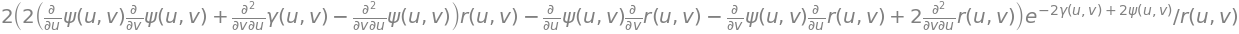

In [23]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [ ]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()